# Visualization

In this notebook you will learn how to:
- Plot axis-aligned slices (XY, XZ, YZ)
- Color by material and show colorbars
- Generate three orthogonal views in one figure
- Slice along an arbitrary plane
- Trace rays and visualize the path
- Compute slice statistics (cell / surface / material counts)

In [1]:
%matplotlib inline
import math
import aleathor as ath

In [2]:
# Build a tokamak-like geometry
model = ath.Model("Tokamak Demo")

plasma_torus = ath.TorusZ(0, 0, 0, major_radius=6.0, minor_radius=2.0)
first_wall   = ath.TorusZ(0, 0, 0, major_radius=6.0, minor_radius=2.3)
vessel_inner = ath.CylinderZ(0, 0, radius=3.5)
vessel_outer = ath.CylinderZ(0, 0, radius=9.0)
boundary     = ath.Box(-12, 12, -12, 12, -5, 5)

model.add_cell(region=-plasma_torus,
               material=0, density=0, name="plasma")
model.add_cell(region=-first_wall & +plasma_torus,
               material=1, density=7.9, name="first_wall")
model.add_cell(region=-vessel_outer & +vessel_inner & +first_wall,
               material=2, density=2.5, name="shielding")
model.add_cell(region=-boundary & +vessel_outer,
               material=3, density=0.001, name="air")
model.add_cell(region=-vessel_inner & +first_wall,
               material=3, density=0.001, name="inner_air")

print(model)

Model: 5 cells, 5 surfaces, 0 universes


## Axis-aligned slices

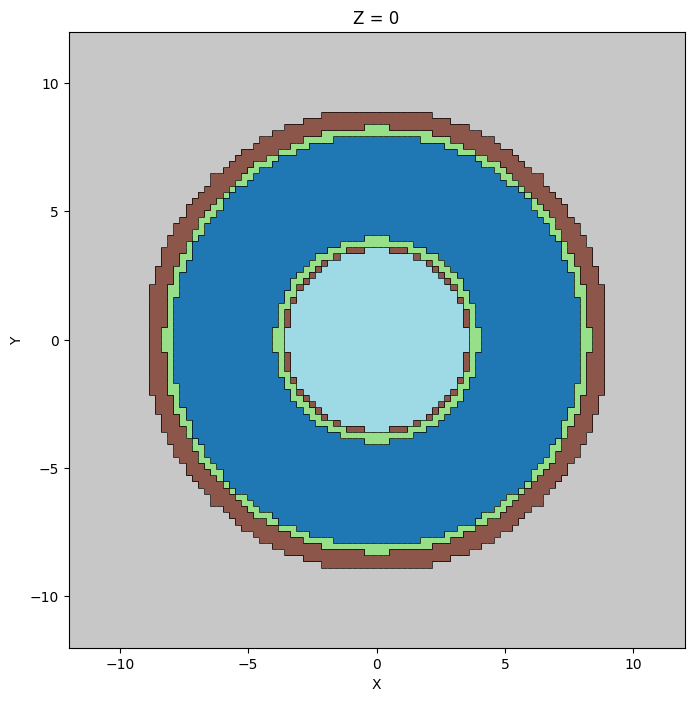

<Axes: title={'center': 'Z = 0'}, xlabel='X', ylabel='Y'>

In [3]:
# XY midplane
model.plot(z=0, bounds=(-12, 12, -12, 12))

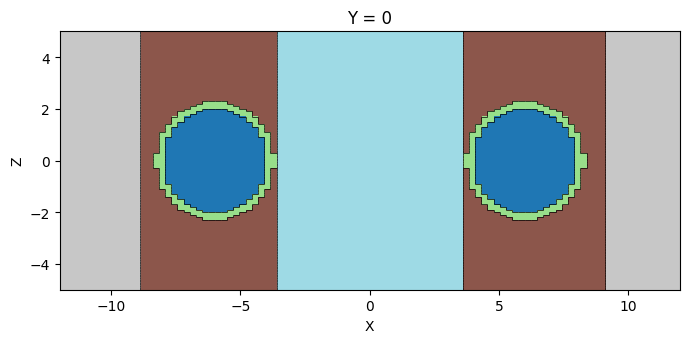

<Axes: title={'center': 'Y = 0'}, xlabel='X', ylabel='Z'>

In [4]:
# XZ vertical cross-section
model.plot(y=0, bounds=(-12, 12, -5, 5))

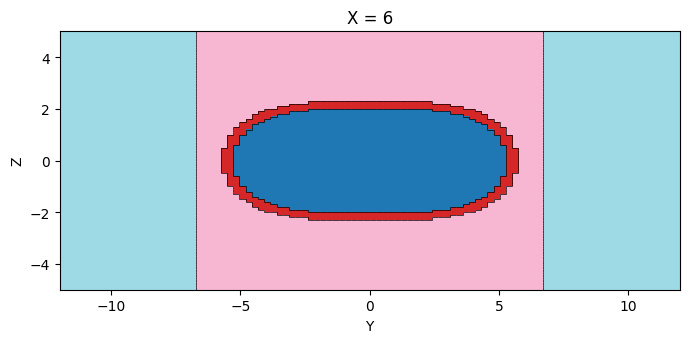

<Axes: title={'center': 'X = 6'}, xlabel='Y', ylabel='Z'>

In [5]:
# YZ slice through the torus at x = 6
model.plot(x=6, bounds=(-12, 12, -5, 5))

## Color by material

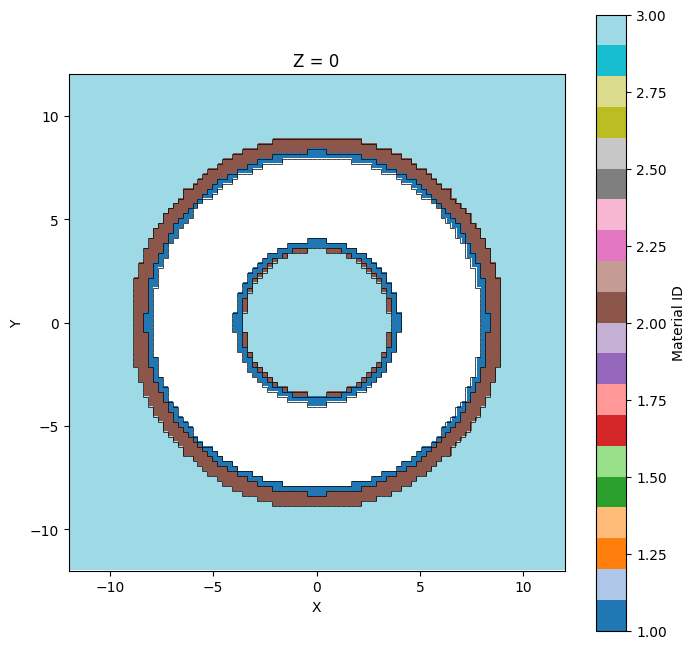

<Axes: title={'center': 'Z = 0'}, xlabel='X', ylabel='Y'>

In [6]:
model.plot(z=0, bounds=(-12, 12, -12, 12),
           by_material=True, show_colorbar=True)

## Three orthogonal views

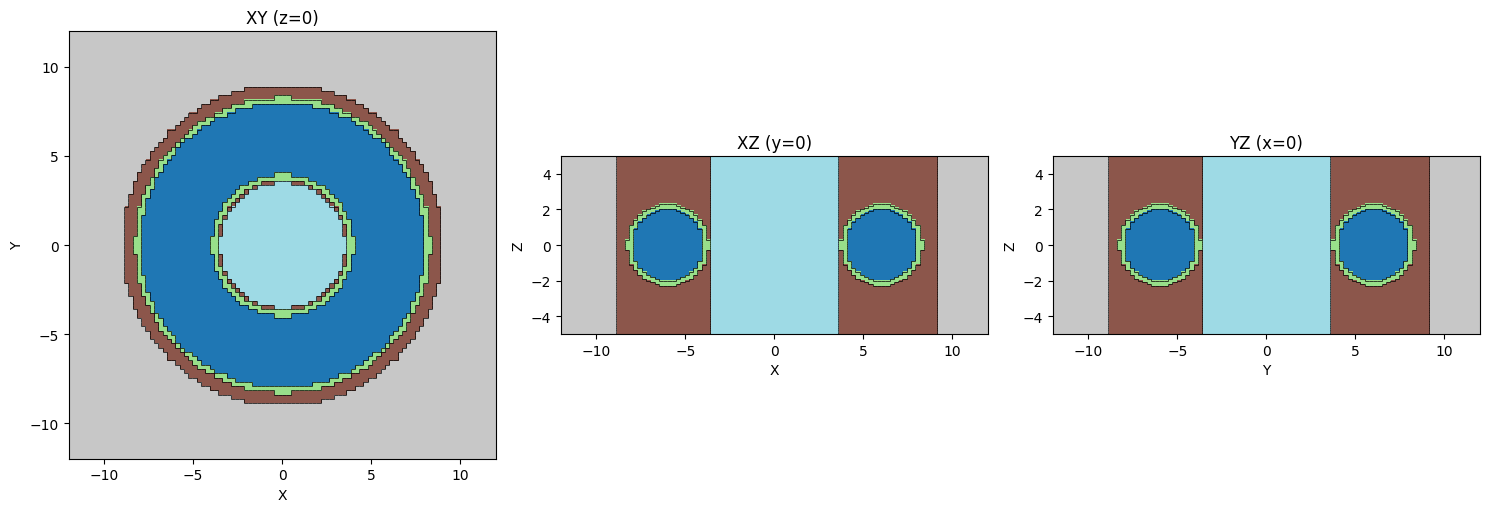

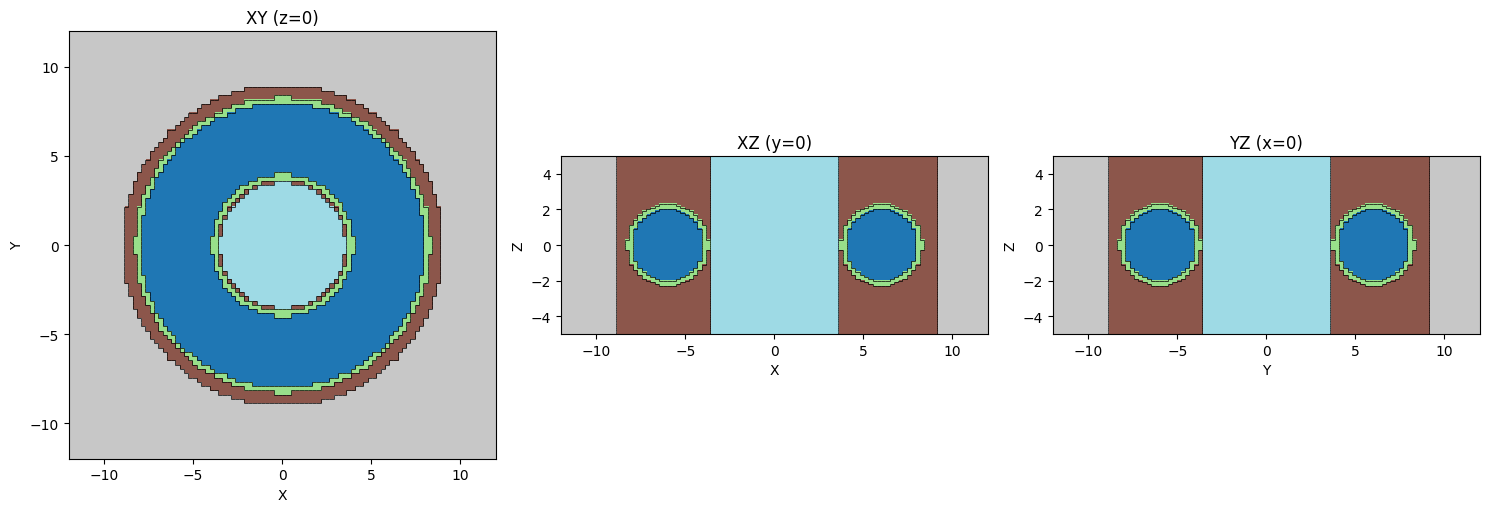

In [7]:
model.plot_views(bounds=(-12, 12, -12, 12, -5, 5))

## Arbitrary plane slices

Specify the plane with `origin`, `normal`, and `up` vectors.

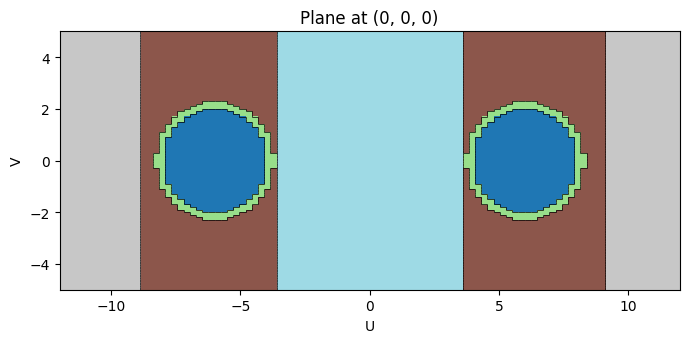

<Axes: title={'center': 'Plane at (0, 0, 0)'}, xlabel='U', ylabel='V'>

In [8]:
# 45-degree diagonal slice through the tokamak
angle = math.radians(45)
model.plot(
    origin=(0, 0, 0),
    normal=(math.sin(angle), math.cos(angle), 0),
    up=(0, 0, 1),
    bounds=(-12, 12, -5, 5),
)

## Ray tracing and visualization

In [9]:
trace = model.trace(start=(-12, 0, 0), end=(12, 0, 0))

print(f"{len(trace)} segments:")
for seg in trace:
    if seg.length < 1e10:
        name = seg.cell.name if seg.cell else "void"
        print(f"  {name:12s}  {seg.length:7.3f} cm  mat {seg.material}")

Lazy-building raycast caches. Call alea_build_spatial_index() before concurrent raycast calls to avoid data races.


11 segments:
  air             3.000 cm  mat 3
  shielding       1.000 cm  mat 2
  plasma          4.000 cm  mat 0
  first_wall      0.500 cm  mat 1
  inner_air       2.493 cm  mat 3
  first_wall      4.507 cm  mat 1
  shielding       0.500 cm  mat 2
  plasma          4.000 cm  mat 0
  first_wall      1.000 cm  mat 1
  air             3.000 cm  mat 3


<Axes: title={'center': 'Ray path through geometry'}, xlabel='Distance along ray'>

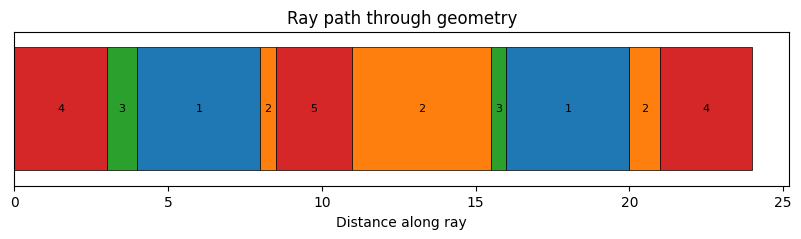

In [10]:
# Plot the ray path as a 1-D bar chart
ath.plot_ray_path(trace._raw_segments)

## Slice statistics

In [11]:
bounds = (-12, 12, -12, 12)
curves = model.get_slice_curves_z(0, bounds)
grid   = model.find_cells_grid_z(0, bounds, resolution=(100, 100))

stats = ath.get_slice_stats(curves, grid)
print(f"XY slice at z = 0:")
print(f"  cells     = {stats['cells']}")
print(f"  surfaces  = {stats['surfaces']}")
print(f"  materials = {stats['materials']}")

XY slice at z = 0:
  cells     = 5
  surfaces  = 5
  materials = 3
